In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data preprocessing

here I will try to map the item id to the name of the item. Then create the matrix with only dummy variables (if the user bought the item ->1 , else 0)

In [0]:
items = pd.read_csv("/content/drive/My Drive/DS2/Week_6/item_to_id.csv")
purchase = pd.read_csv("/content/drive/My Drive/DS2/Week_6/purchase_history.csv")

In [94]:
items

Item_name  Item_id
0              coffee       43
1                 tea       23
2               juice       38
3                soda        9
4     sandwich loaves       39
5        dinner rolls       37
6           tortillas       34
7              bagels       13
8   canned vegetables       28
9     spaghetti sauce       26
10            ketchup       41
11            cheeses       21
12               eggs       14
13               milk       16
14             yogurt       48
15             butter        8
16            cereals       11
17              flour       30
18              sugar        1
19              pasta       31
20            waffles        5
21  frozen vegetables       22
22          ice cream       36
23            poultry        6
24               beef       17
25               pork       47
26            bananas       46
27            berries       40
28           cherries       25
29         grapefruit       20
30             apples       32
31           broccoli       44
32            carrots       10
33        cauliflower       45
34          cucumbers       42
35            lettuce        2
36  laundry detergent       18
37       dishwashing        27
38       paper towels       24
39       toilet paper       33
40      aluminum foil       15
41      sandwich bags        7
42            shampoo       12
43               soap       35
44          hand soap       29
45      shaving cream       19
46         baby items        4
47          pet items        3

In [0]:
purchase["id"] = purchase["id"].apply(lambda x: x.split(","))

In [0]:
purchase["id"] = purchase["id"].apply(lambda x: [int(i) for i in x])

In [97]:
items_dict = items.set_index("Item_id").T.to_dict("dict")
items_dict

{1: {'Item_name': 'sugar'},
 2: {'Item_name': 'lettuce'},
 3: {'Item_name': 'pet items'},
 4: {'Item_name': 'baby items'},
 5: {'Item_name': 'waffles'},
 6: {'Item_name': 'poultry'},
 7: {'Item_name': 'sandwich bags'},
 8: {'Item_name': 'butter'},
 9: {'Item_name': 'soda'},
 10: {'Item_name': 'carrots'},
 11: {'Item_name': 'cereals'},
 12: {'Item_name': 'shampoo'},
 13: {'Item_name': 'bagels'},
 14: {'Item_name': 'eggs'},
 15: {'Item_name': 'aluminum foil'},
 16: {'Item_name': 'milk'},
 17: {'Item_name': 'beef'},
 18: {'Item_name': 'laundry detergent'},
 19: {'Item_name': 'shaving cream'},
 20: {'Item_name': 'grapefruit'},
 21: {'Item_name': 'cheeses'},
 22: {'Item_name': 'frozen vegetables'},
 23: {'Item_name': 'tea'},
 24: {'Item_name': 'paper towels'},
 25: {'Item_name': 'cherries'},
 26: {'Item_name': 'spaghetti sauce'},
 27: {'Item_name': 'dishwashing\xa0'},
 28: {'Item_name': 'canned vegetables'},
 29: {'Item_name': 'hand soap'},
 30: {'Item_name': 'flour'},
 31: {'Item_name': 'p

In [0]:
items_dict[27]['Item_name'] = "dishwashing"

In [99]:
item_names = [items_dict[i]['Item_name'] for i in range(1,len(items_dict)+1)]
item_names[:10]

['sugar',
 'lettuce',
 'pet items',
 'baby items',
 'waffles',
 'poultry',
 'sandwich bags',
 'butter',
 'soda',
 'carrots']

In [0]:
def convert_id_to_items(id):
  items = [items_dict[i]['Item_name'] for i in id]
  return items

In [0]:
purchase["items"] = purchase["id"].apply(lambda x: convert_id_to_items(x))

In [102]:
purchase.drop("id",axis=1,inplace = True)
purchase.head()

user_id                                              items
0   222087                     [dishwashing, spaghetti sauce]
1  1343649                              [poultry, pork, beef]
2   404134  [laundry detergent, shampoo, tea, frozen veget...
3  1110200  [soda, tea, lettuce, grapefruit, spaghetti sau...
4   224107  [pasta, laundry detergent, waffles, bagels, su...

In [0]:
def transform_to_dataframe(item_names,df1):
  list_of_dummies = []
  for user in df1:
    for row in df1["items"]:
      item_dummies = [0]*len(item_names)
      for item in row: 
        i = item_names.index(item)
        item_dummies[i] = 1
        list_of_dummies.append(item_dummies)
  return list_of_dummies

In [0]:
list_of_item = transform_to_dataframe(item_names,purchase)

In [0]:
df = pd.DataFrame(list_of_item, columns = item_names)

In [106]:
df.head()

sugar  lettuce  pet items  baby items  waffles  poultry  sandwich bags  \
0      0        0          0           0        0        0              0   
1      0        0          0           0        0        0              0   
2      0        0          0           0        0        1              0   
3      0        0          0           0        0        1              0   
4      0        0          0           0        0        1              0   

   butter  soda  carrots   ...    sandwich loaves  berries  ketchup  \
0       0     0        0   ...                  0        0        0   
1       0     0        0   ...                  0        0        0   
2       0     0        0   ...                  0        0        0   
3       0     0        0   ...                  0        0        0   
4       0     0        0   ...                  0        0        0   

   cucumbers  coffee  broccoli  cauliflower  bananas  pork  yogurt  
0          0       0         0            0        0     0       0  
1          0       0         0            0        0     0       0  
2          0       0         0            0        0     1       0  
3          0       0         0            0        0     1       0  
4          0       0         0            0        0     1       0  

[5 rows x 48 columns]

# Hierachial clustering

I will create the correlation matrix from the "dummy dataframe" and then draw the denogram to find the clusters

In [107]:
correlation = df.corr()
correlation

sugar   lettuce  pet items  baby items   waffles  \
sugar              1.000000  0.078058   0.100479    0.062392  0.040640   
lettuce            0.078058  1.000000   0.087046    0.039104  0.009943   
pet items          0.100479  0.087046   1.000000    0.068456  0.024922   
baby items         0.062392  0.039104   0.068456    1.000000  0.018761   
waffles            0.040640  0.009943   0.024922    0.018761  1.000000   
poultry            0.014180  0.026592   0.023700    0.011816  0.002959   
sandwich bags      0.028617  0.025468   0.020989    0.016532  0.012766   
butter             0.018284  0.014784   0.017622    0.013164  0.002314   
soda               0.025542  0.023723   0.020809    0.016559  0.017347   
carrots            0.015508  0.134367   0.019407    0.018429  0.004294   
cereals            0.055510  0.017430   0.019096    0.021893  0.071574   
shampoo            0.019377  0.020984   0.007591    0.017796  0.016432   
bagels             0.013963  0.029204   0.020013    0.017844  0.007283   
eggs               0.025654  0.015840   0.015963    0.013879 -0.006076   
aluminum foil      0.012443  0.010808   0.012525    0.006084  0.005767   
milk               0.022231  0.017870   0.021380    0.008341  0.001648   
beef               0.020954  0.031512   0.019465    0.018876  0.003516   
laundry detergent  0.035589  0.029512   0.036777    0.011950  0.016051   
shaving cream      0.034094  0.021113   0.012597    0.022707  0.011059   
grapefruit         0.020867  0.016089   0.015332    0.012167  0.010986   
cheeses            0.024481  0.014840   0.024148    0.012639  0.010472   
frozen vegetables  0.024702  0.027145   0.024695    0.018163  0.019530   
tea                0.025713  0.026020   0.023388    0.008942  0.011371   
paper towels       0.022989  0.028698   0.022421    0.006153  0.000579   
cherries           0.025135  0.010609   0.023549    0.003918  0.010118   
spaghetti sauce    0.020444  0.012854   0.019992    0.008737  0.004628   
dishwashing        0.027841  0.019821   0.018536    0.009588  0.025388   
canned vegetables  0.033510  0.022236   0.019896    0.005907  0.003281   
hand soap          0.025222  0.025560   0.009112    0.019554 -0.007941   
flour              0.052964  0.020780   0.007059    0.014053  0.089678   
pasta              0.052528  0.017076   0.020222    0.002215  0.081196   
apples             0.019361  0.022758   0.019746    0.006975  0.007017   
toilet paper       0.017114  0.025601   0.024594    0.014749  0.006971   
tortillas          0.024104  0.022949   0.012481    0.010368  0.004535   
soap               0.021666  0.006150   0.013078    0.010519  0.003092   
ice cream          0.037115  0.025195   0.020158    0.018541  0.021746   
dinner rolls       0.020932  0.020294   0.009936    0.013008  0.014345   
juice              0.025508  0.025366   0.017038    0.004281  0.013516   
sandwich loaves    0.015887  0.025276   0.014949    0.005613  0.019815   
berries            0.022616  0.018201   0.021015    0.017556  0.013403   
ketchup            0.028522  0.017900   0.001497    0.005929  0.020828   
cucumbers          0.010182  0.124997   0.014054   -0.003184  0.004406   
coffee             0.027075  0.015585   0.010278    0.007641  0.014174   
broccoli           0.023607  0.129104   0.027703    0.007409  0.013247   
cauliflower        0.017897  0.127015   0.024133    0.013484  0.006303   
bananas            0.024794  0.016948   0.012493    0.015806  0.011321   
pork               0.031493  0.019322   0.021103    0.024929  0.006590   
yogurt             0.013541  0.008191   0.026933    0.021390  0.005103   

                    poultry  sandwich bags    butter      soda   carrots  \
sugar              0.014180       0.028617  0.018284  0.025542  0.015508   
lettuce            0.026592       0.025468  0.014784  0.023723  0.134367   
pet items          0.023700       0.020989  0.017622  0.020809  0.019407   
baby items         0.011816       0.016532  0.013164  0.016559  0.018429   
waffles        

In [0]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [113]:
corr_mat = correlation.as_matrix()
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
cluster.fit_predict(corr_mat)


array([0, 2, 0, 0, 0, 6, 0, 5, 4, 2, 0, 0, 7, 5, 0, 5, 6, 0, 0, 1, 5, 0,
       4, 0, 1, 3, 0, 3, 0, 0, 0, 1, 0, 7, 0, 0, 7, 4, 7, 1, 3, 2, 4, 2,
       2, 1, 6, 5])

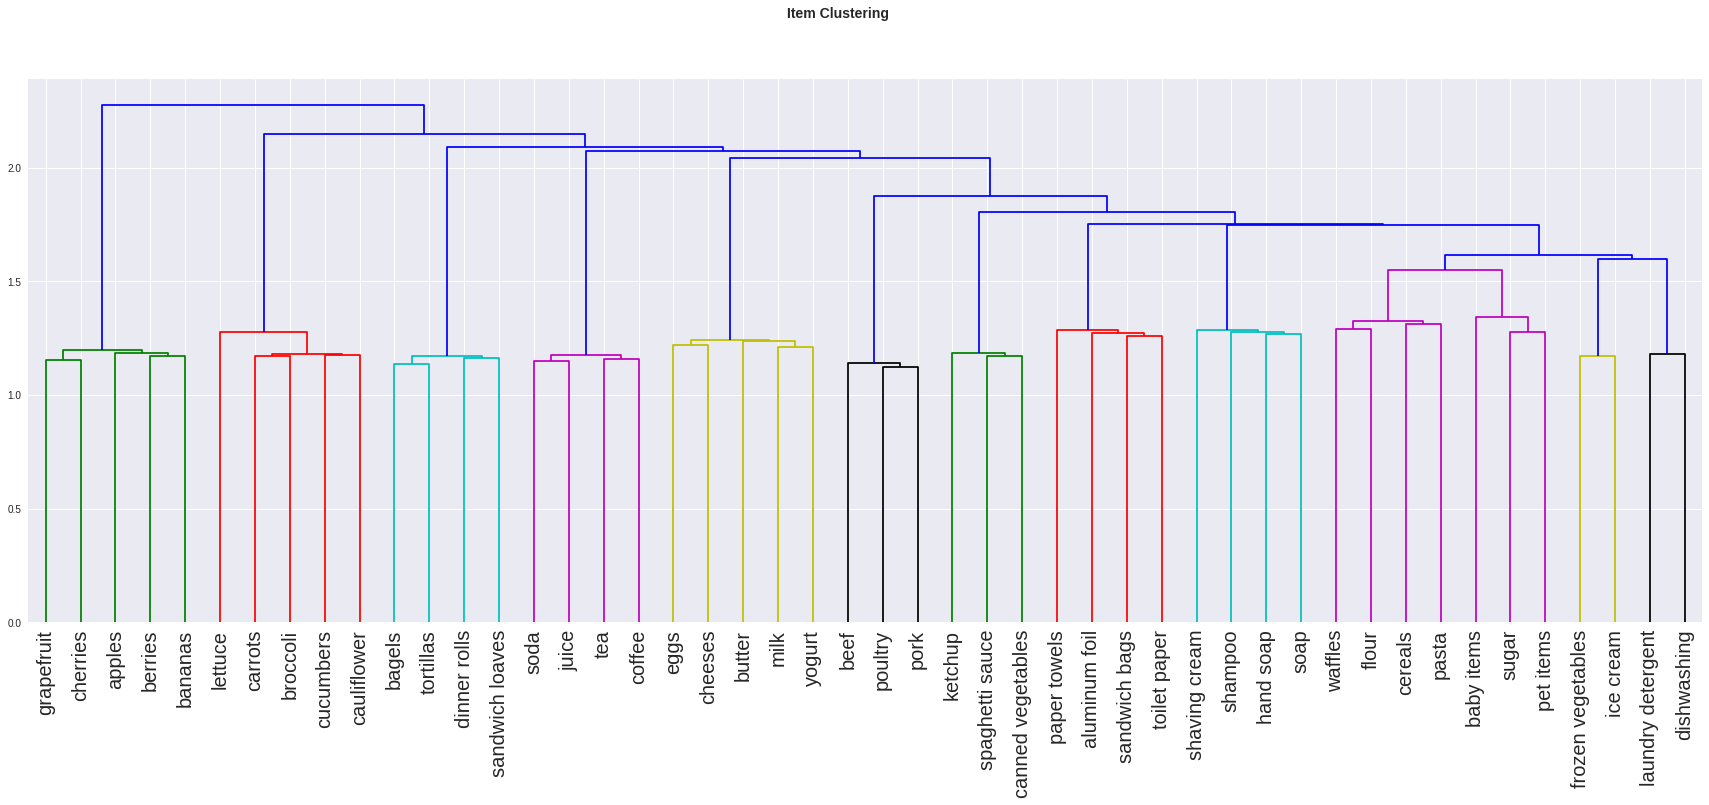

In [118]:
linked = linkage(corr_mat, 'ward')

labelList = correlation.columns

plt.figure(figsize=(30, 10))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            leaf_font_size = 20,
            show_leaf_counts=True)

plt.suptitle('Item Clustering', fontweight='bold', fontsize=14);
plt.show()  

Setting a thredshold, we can find 12 clusters:


1.   grapefruit, cherries, apples, berries, bananas
2.   letuce, carrots, broccoli, cucumbers, cauliflower
3.   bagels, tortillas, dinner rolls, sandwich loaves
4.   soda, juice, tea, coffee
5.   eggs, cheeses, butter, milk, yogurt
6.   beef, poultry, pork
7.   ketchup, spaghetty sauce, canned vegetables, 
8. paper towels, aluminum foil, sandwich bags, toilet paper
9. shaving cream, shampoo, hand soap
10. waffles, flour, cereals, paster, baby items
11. frozen vegetables, ice cream
12. laundry detergent, dishwashing




